In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("uber.csv",parse_dates=["pickup_datetime"])
df.head()

Unnamed: 0                            key  fare_amount   
0    24238194    2015-05-07 19:52:06.0000003          7.5  \
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

            pickup_datetime  pickup_longitude  pickup_latitude   
0 2015-05-07 19:52:06+00:00        -73.999817        40.738354  \
1 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

<Axes: xlabel='passenger_count', ylabel='count'>

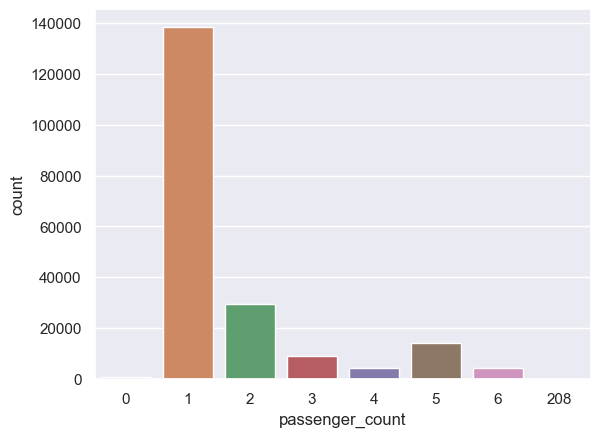

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(x=df["passenger_count"])

In [12]:
df=df[df["passenger_count"]==1]
df=df.drop(["key","passenger_count"],axis=1)
df.head()

Unnamed: 0  fare_amount           pickup_datetime  pickup_longitude   
0    24238194          7.5 2015-05-07 19:52:06+00:00        -73.999817  \
1    27835199          7.7 2009-07-17 20:04:56+00:00        -73.994355   
2    44984355         12.9 2009-08-24 21:45:00+00:00        -74.005043   
5    44470845          4.9 2011-02-12 02:27:09+00:00        -73.969019   
7    44195482          2.5 2012-12-11 13:52:00+00:00          0.000000   

   pickup_latitude  dropoff_longitude  dropoff_latitude  
0        40.738354         -73.999512         40.723217  
1        40.728225         -73.994710         40.750325  
2        40.740770         -73.962565         40.772647  
5        40.755910         -73.969019         40.755910  
7         0.000000           0.000000          0.000000

In [13]:
df.shape

(138425, 7)

In [14]:
corr_matrix=df.corr()


In [15]:
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
pickup_datetime      0.118828
pickup_longitude     0.009522
dropoff_longitude    0.009388
Unnamed: 0           0.000581
pickup_latitude     -0.007403
dropoff_latitude    -0.012091
Name: fare_amount, dtype: float64

In [ ]:
from math import sqrt
for i,row in df.iterrows():
  dt=row["pickup_datetime"]
  df.at[i,"day_of_week"]=dt.weekday()
  df.at[i,"pickup_time"]=dt.hour
  x=(row["dropoff_longitude"]-row["pickup_longitude"])*54.6
  y= (row["dropoff_latitude"]-row["pickup_latitude"])*69.0
  distance=sqrt(x**2+y**2)
  df.at[i,"distance"]=distance

df.head()

Unnamed: 0  fare_amount           pickup_datetime  pickup_longitude  \
0    24238194          7.5 2015-05-07 19:52:06+00:00        -73.999817   
1    27835199          7.7 2009-07-17 20:04:56+00:00        -73.994355   
2    44984355         12.9 2009-08-24 21:45:00+00:00        -74.005043   
5    44470845          4.9 2011-02-12 02:27:09+00:00        -73.969019   
7    44195482          2.5 2012-12-11 13:52:00+00:00          0.000000   

   pickup_latitude  dropoff_longitude  dropoff_latitude  day_of_week  \
0        40.738354         -73.999512         40.723217          3.0   
1        40.728225         -73.994710         40.750325          4.0   
2        40.740770         -73.962565         40.772647          0.0   
5        40.755910         -73.969019         40.755910          5.0   
7         0.000000           0.000000          0.000000          1.0   

   pickup_time  distance  
0         19.0  1.044567  
1         20.0  1.525023  
2         21.0  3.196405  
5          2.0  0.000000  
7         13.0  0.000000

In [ ]:
df.drop(columns=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],inplace=True)

In [ ]:
df.head()

Unnamed: 0  fare_amount  day_of_week  pickup_time  distance
0    24238194          7.5          3.0         19.0  1.044567
1    27835199          7.7          4.0         20.0  1.525023
2    44984355         12.9          0.0         21.0  3.196405
5    44470845          4.9          5.0          2.0  0.000000
7    44195482          2.5          1.0         13.0  0.000000

In [ ]:
corr_matrix=df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
day_of_week    0.012516
distance       0.010927
Unnamed: 0     0.000581
pickup_time   -0.017476
Name: fare_amount, dtype: float64

<Axes: >

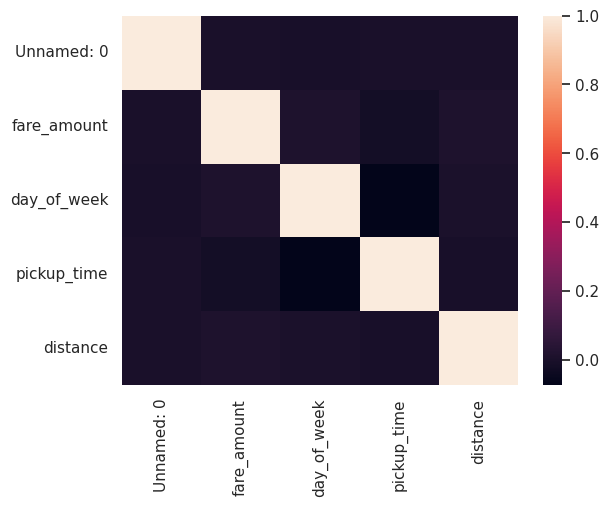

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
df.describe()

Unnamed: 0    fare_amount    day_of_week    pickup_time  \
count  1.384250e+05  138425.000000  138425.000000  138425.000000   
mean   2.767942e+07      11.254158       2.971848      13.372794   
std    1.599722e+07       9.855264       1.930082       6.417891   
min    1.000000e+00     -10.900000       0.000000       0.000000   
25%    1.379461e+07       6.000000       1.000000       9.000000   
50%    2.771388e+07       8.500000       3.000000      14.000000   
75%    4.150225e+07      12.500000       5.000000      19.000000   
max    5.542357e+07     499.000000       6.000000      23.000000   

            distance  
count  138425.000000  
mean       16.018623  
std       634.719348  
min         0.000000  
25%         0.760683  
50%         1.327296  
75%         2.410681  
max    161504.979693

<Axes: xlabel='distance'>

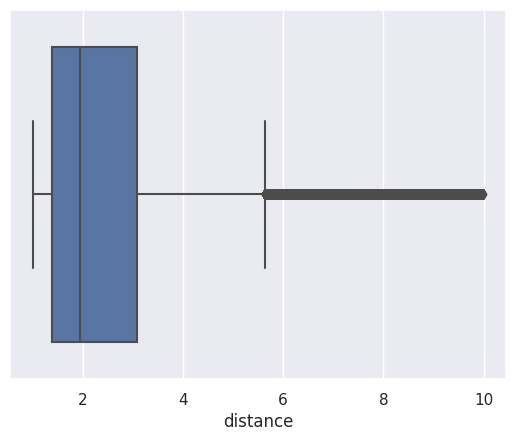

In [ ]:
sns.boxplot(x=df["distance"])

<Axes: xlabel='fare_amount'>

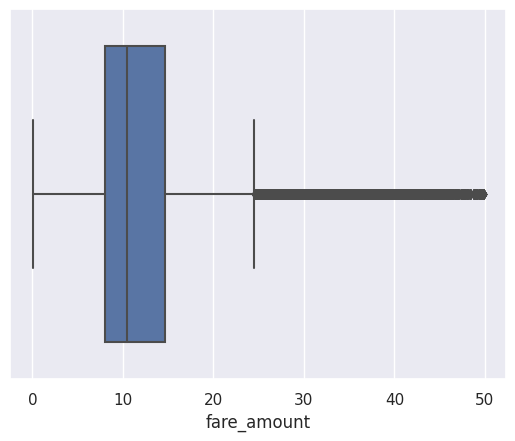

In [ ]:
sns.boxplot(x=df["fare_amount"])

In [ ]:
df=df[(df['distance']>1.0)&(df['distance']<10.0)]
df=df[(df['fare_amount']>0.0)&(df['fare_amount']<50.0)]

In [ ]:
corr_matrix=df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount    1.000000
distance       0.850258
Unnamed: 0    -0.001991
day_of_week   -0.002164
pickup_time   -0.020249
Name: fare_amount, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(["fare_amount"],axis=1)
y=df["fare_amount"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model=LinearRegression()

cross_val_score(model,X_train,y_train,cv=5).mean()

0.7230793593617827

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("R2:", r2_score(y_test,y_pred))

R2: 0.7250658640475374


In [ ]:
import numpy as np

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3.603310277779024


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()


In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("R2:", r2_score(y_test,y_pred))

R2: 0.724232439240774


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3.6087676134840296
